In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('./hi-train.csv',header= None)
df.head()

0  \
0   neutral   
1  positive   
2   neutral   
3   neutral   
4  positive   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [4]:
df.columns = ["labels","Reviews"]

In [5]:
df.head()

labels  \
0   neutral   
1  positive   
2   neutral   
3   neutral   
4  positive   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [6]:
df.describe()

,labels,Reviews
count,2480,2480
unique,3,2476
top,positive,"एक दस्तावेज जॉन के हाथ लगता है, जो गौतम (रणदीप हुड्डा) के लिए जरूरी है।"
freq,1042,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   2480 non-null   object
 1   Reviews  2480 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [8]:
df.labels.value_counts()

labels
positive    1042
negative     741
neutral      697
Name: count, dtype: int64

In [8]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [10]:
from googletrans import Translator

In [11]:
# Initialize the Google Translate API client
translator = Translator()

# Back-translation function using Google Translate (Hindi -> French -> Hindi)
def google_back_translate(review, target_language):
    try:
        # Translate to target language (e.g., French)
        translated = translator.translate(review, src='hi', dest=target_language).text
        # Translate back to Hindi
        back_translated = translator.translate(translated, src=target_language, dest='hi').text
        print(f"Translated Review")
        return back_translated
    except Exception as e:
        print(f"Translation failed: {e}")
        return review  # Return the original review in case of failure


In [12]:
google_back_translate(df['Reviews'][1],'fr'),google_back_translate(df['Reviews'][1],'en')

Translation failed: the JSON object must be str, bytes or bytearray, not NoneType
Translated Review


('’उड़ान’ से विक्रमादित्य\nमोटवाने\nने अच्छे सिनेमा की उम्मीद जगाई थी और ‘लुटेरा’ में उन्होंने उम्मीदों को पूरा किया। एक बेहतरीन प्रेम कहानी लंबे समय बाद परदे पर आई है। ओ हेनरी की कहानी ‘द लास्ट लीफ’ को आधार बनाकर उसे गुजरे जमाने का टच दिया और अपने शानदार प्रस्तुति के बल पर विक्रम ने \u200d’लुटेरे’ को देखने लायक बनाया है।\n\nपूरी फिल्म में निर्देशक का दबदबा है। उन्होंने दूसरी चीजों को हावी नहीं होने दिया और अपनी पकड़ बनाए रखी है। कई बार कहानी हिचकोले खाती है, लेकिन विक्रमादित्य ने इन झटकों को भी अच्छी तरह संभाल लिया है।\n\nकहानी पचास के दशक में सेट है। माणिकपुर का जमींदार उदास है। वह एक आम आदमी से कहता है कि आजादी तुम्हारे लिए खुशियां लाई हैं, लेकिन हमारी जिंदगी खराब हो गई है। सरकार ने जमींदारों से जमीन और कीमती सामान लेना शुरू कर दिए हैं। उनके दबदबे को खत्म किया जा रहा है। इस बात का फायदा कई लोग उठा रहे हैं और सरकारी ऑफिसर बन जमींदारों के माल पर हाथ साफ कर रहे हैं।\nमनिकपुर में पुरातन विभाग का अधिकारी वरुण श्रीवास्तव आता है। जमींदार के मंदिर के आसपास खुदाई की इजाजत लेता है। उसका कहना 

In [26]:
lens = []

for i,rows in df.iterrows():
    lens.append(len(rows['Reviews']))
    # print(i,rows['Reviews'])

np.mean(lens)
# np.unique(lens,return_counts=True)

1051.7629032258064

In [27]:

# Apply Google Translate back-translation to the 'Reviews' column
df['Backtranslated_movie_Reviews_Google_fr'] = df['Reviews'].apply(lambda x: google_back_translate(x, target_language='fr'))

# Save the augmented data to a new CSV file if needed
df.to_csv('augmented_movie_reviews_google_fr.csv', index=False)

Translated Review
Translation failed: the JSON object must be str, bytes or bytearray, not NoneType
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translation failed: the JSON object must be str, bytes or bytearray, not NoneType
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translat

In [13]:
# Apply Google Translate back-translation to the 'Reviews' column
df['Backtranslated_movies_Reviews_Google_en'] = df['Reviews'].apply(lambda x: google_back_translate(x, target_language='en'))

# Save the augmented data to a new CSV file if needed
df.to_csv('augmented_movies_reviews_google_en.csv', index=False)

Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translation failed: the JSON object must be str, bytes or bytearray, not NoneType
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review
Translated Review


In [14]:
df1 = pd.read_csv('./augmented_movie_reviews_google_fr.csv')
df2 = pd.read_csv('./augmented_movies_reviews_google_en.csv')

In [15]:
df1.head()

labels  \
0   neutral   
1  positive   
2   neutral   
3   neutral   
4  positive   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [16]:
df2.head()

labels  \
0   neutral   
1  positive   
2   neutral   
3   neutral   
4  positive   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [18]:
df1.info(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   labels                                  2480 non-null   object
 1   Reviews                                 2480 non-null   object
 2   Backtranslated_movie_Reviews_Google_fr  2480 non-null   object
dtypes: object(3)
memory usage: 58.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   labels                                   2480 non-null   object
 1   Reviews                                  2480 non-null   object
 2   Backtranslated_movies_Reviews_Google_en  2480 non-null   object
dtypes: object(3)
memory usage: 58.2+ KB


(None, None)

In [19]:
df_combined = pd.concat([df1[['Backtranslated_movie_Reviews_Google_fr','labels']].rename(columns={'Backtranslated_movie_Reviews_Google_fr': 'Reviews'}),
           df2[['Backtranslated_movies_Reviews_Google_en','labels']].rename(columns={'Backtranslated_movies_Reviews_Google_en' : 'Reviews'}),
           df1[['Reviews','labels']]],axis = 0)

In [20]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7440 entries, 0 to 2479
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  7440 non-null   object
 1   labels   7440 non-null   object
dtypes: object(2)
memory usage: 174.4+ KB


In [21]:
df_combined.to_csv('augmented_movies_reviews.csv', index=False)

In [22]:
df_combined.isna().sum()

Reviews    0
labels     0
dtype: int64

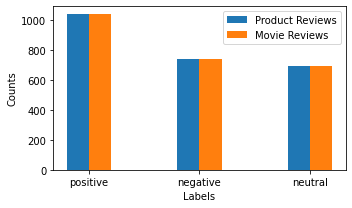

In [23]:
# Count value counts for each dataset
counts1 = df1['labels'].value_counts()
counts2 = df2['labels'].value_counts()

# Combine counts into a single DataFrame, filling missing labels with 0
combined_counts = pd.DataFrame({'Dataset 1': counts1, 'Dataset 2': counts2}).fillna(0)

# Plot the histogram
labels = combined_counts.index
x = np.arange(len(labels))  # label locations
width = 0.20  # width of the bars

fig, ax = plt.subplots(figsize=(5, 3))
bars1 = ax.bar(x - width/2, combined_counts['Dataset 1'], width, label='Product Reviews')
bars2 = ax.bar(x + width/2, combined_counts['Dataset 2'], width, label='Movie Reviews')

# Add labels, title, and legend
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
# ax.set_title('Label Value Counts for Two Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [100]:
sns.set_theme(style="ticks")
sns.set_context("notebook")
sns.set_palette(sns.color_palette("muted"))
sns.set_style("whitegrid", {"axes.edgecolor": "black", "grid.color": ".8"})



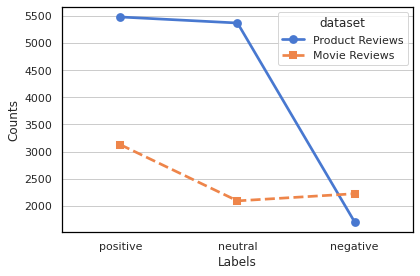

In [101]:
import seaborn as sns

# Count value counts for each dataset
counts1 = df1['labels'].value_counts().reset_index()
counts1.columns = ['label', 'count']
counts1['dataset'] = 'Product Reviews'

counts2 = df2['labels'].value_counts().reset_index()
counts2.columns = ['label', 'count']
counts2['dataset'] = 'Movie Reviews'

# Combine counts into a single DataFrame
combined_counts = pd.concat([counts1, counts2], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.pointplot(data=combined_counts, x='label', y='count', hue='dataset', markers=["o", "s"], linestyles=["-", "--"])
# sns.stripplot(data=combined_counts, x='label', y='count', hue='dataset', dodge=True, size=8)
# sns.swarmplot(data=combined_counts, x='label', y='count', hue='dataset', dodge=True, size=8)
# plt.stem(combined_counts['label'], combined_counts['count'], linefmt='grey', markerfmt='o')
# sns.scatterplot(data=combined_counts, x='label', y='count', hue='dataset', size='count', sizes=(50, 200))
# sns.rugplot(data=combined_counts, x='label', hue='dataset', height=0.1)
# sns.kdeplot(data=combined_counts, x='count', hue='dataset', fill=True)
# sns.scatterplot(data=combined_counts, x='label', y='count', hue='dataset', style='dataset')
# sns.violinplot(data=combined_counts, x='label', y='count', hue='dataset', split=True)
# sns.stripplot(data=combined_counts, x='label', y='count', hue='dataset', dodge=True, size=5)
# pivot_table = combined_counts.pivot('label', 'dataset', 'count').fillna(0)
# pivot_table = combined_counts.pivot(index='label', columns='dataset', values='count').fillna(0)
# sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f', cbar=True)



# Add labels, title, and legend
# plt.title('Label Value Counts for Two Datasets')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.tight_layout()


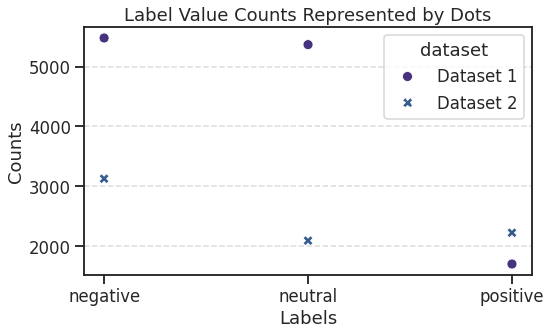

In [65]:
counts1 = df1['labels'].value_counts().reset_index()
counts1.columns = ['label', 'count']
counts1['dataset'] = 'Dataset 1'

counts2 = df2['labels'].value_counts().reset_index()
counts2.columns = ['label', 'count']
counts2['dataset'] = 'Dataset 2'

# Combine counts into a single DataFrame
combined_counts = pd.concat([counts1, counts2], ignore_index=True)

# Custom ordering for labels on x-axis (optional)
label_order = sorted(combined_counts['label'].unique())

# Plot using Seaborn scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=combined_counts, 
    x='label', 
    y='count', 
    hue='dataset', 
    style='dataset', 
    s=100  # Size of dots
)

# Add labels, title, and tweak axis
plt.title('Label Value Counts Represented by Dots')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(ticks=range(len(label_order)), labels=label_order)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
